In [3]:
import pandas as pd
mapp=pd.read_csv('mapping.csv')
mapp.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [4]:
?pd.read_csv

In [5]:
##unds2=pd.read_csv('C:\\Users\\Administrator\\Desktop\\Teclov\\rounds2.csv',encoding="unicode_escape",converters={'company_permalink':lambda x:x.replace('/',' ')})
#the above lambda function can also be used to replace 
rounds2=pd.read_csv('rounds2.csv',encoding="unicode_escape")
rounds2['company_permalink']=rounds2['company_permalink'].str.upper()
rounds2.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
companies=pd.read_csv('companies.txt',encoding="unicode_escape",sep='\t')
companies['permalink']=companies['permalink'].str.upper()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?


In [7]:
master_frame=pd.merge(companies,rounds2,left_on='permalink',right_on='company_permalink')
master_frame['company_permalink'].nunique()
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Are there any companies in the rounds2 ﬁle which are not present in companies? Answer yes or no: Y/N, Ans=Y


In [8]:
print(rounds2.shape)
rounds2['company_permalink'].nunique()

(114949, 6)


66370

In [9]:
print(companies.shape)
companies['permalink'].nunique()

(66368, 10)


66368

In [10]:
noc=companies.groupby('permalink').size().count()      ##no of companies in companies 
noc

66368

In [11]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [12]:
nor=rounds2.groupby('company_permalink').nunique().count()           ##no of companies in rounds2
nor

company_permalink          66370
funding_round_permalink    66370
funding_round_type         66370
funding_round_code         66370
funded_at                  66370
raised_amount_usd          66370
dtype: int64

###  Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in the template provided on the previous page 


In [47]:
m_f=master_frame.pivot_table(index='funding_round_type',values='raised_amount_usd',aggfunc='mean')
m_f#.query('raised_amount_usd > 5000000'and'raised_amount_usd<15000000')

,raised_amount_usd
funding_round_type,
angel,9.586945e+05
convertible_note,1.453439e+06
debt_financing,1.704353e+07
equity_crowdfunding,5.383682e+05
grant,4.300576e+06
non_equity_assistance,4.112031e+05
post_ipo_debt,1.687046e+08
post_ipo_equity,8.218249e+07
private_equity,7.330859e+07


In [66]:
m_fx=master_frame.pivot_table(index='funding_round_type',values='raised_amount_usd',aggfunc='mean')
m_fx.query('raised_amount_usd > 5000000'and'raised_amount_usd<15000000')

,raised_amount_usd
funding_round_type,
angel,9.586945e+05
convertible_note,1.453439e+06
equity_crowdfunding,5.383682e+05
grant,4.300576e+06
non_equity_assistance,4.112031e+05
product_crowdfunding,1.363131e+06
seed,7.197796e+05
venture,1.174895e+07


In [48]:
m_f.reset_index(inplace=True)
m_f

,funding_round_type,raised_amount_usd
0,angel,9.586945e+05
1,convertible_note,1.453439e+06
2,debt_financing,1.704353e+07
3,equity_crowdfunding,5.383682e+05
4,grant,4.300576e+06
5,non_equity_assistance,4.112031e+05
6,post_ipo_debt,1.687046e+08
7,post_ipo_equity,8.218249e+07
8,private_equity,7.330859e+07
9,product_crowdfunding,1.363131e+06


In [53]:
m_f1=m_f.loc[(8,11,13),]
m_f1

,funding_round_type,raised_amount_usd
8,private_equity,7.330859e+07
11,seed,7.197796e+05
13,venture,1.174895e+07


In [62]:
m_f1.set_index('funding_round_type',inplace=True)

KeyError: 'funding_round_type'

In [14]:
## only venture capital will lie in the ramge of 5 million to 15 million(1.174895e+07=11748950) all others are not in range
#(seed	7.197796e+05=719779.6),(angel	9.586945e+05=958694.5),(private_equity	7.330859e+07=73308590)
#**note- e+05 is 5 values after decimal

In [63]:
m_f1

,raised_amount_usd
funding_round_type,
private_equity,7.330859e+07
seed,7.197796e+05
venture,1.174895e+07


### 1. Teclov wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type) 
### 2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [15]:
zx=master_frame[master_frame['funding_round_type']=='venture']
zx

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0


In [16]:
top9=master_frame.pivot_table(index='country_code',values='raised_amount_usd',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head(9)
top9

,raised_amount_usd
country_code,
USA,6.694821e+11
CHN,7.570357e+10
GBR,3.276705e+10
IND,2.768634e+10
CAN,1.842468e+10
RUS,1.127912e+10
DEU,1.001776e+10
ISR,9.713885e+09
FRA,9.059771e+09


### top 3 english speaking countries

In [17]:
## 1. Top English-speaking country              
# 2. Second English-speaking country
 # 3. Third English-speaking country


In [18]:
s3= {'Top English-speaking country':'USA','Second English-speaking country':'GBR','Third English-speaking country':'IND'}

In [19]:
s3=pd.Series(s3)

In [20]:
s3=pd.DataFrame(s3)
s3

,0
Top English-speaking country,USA
Second English-speaking country,GBR
Third English-speaking country,IND


### 1. Extract the primary sector of each category list from the category_list column 
### 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [21]:
mf5=zx['category_list'].str.split('|').str[0]   ##by this first word is extracted #we can add tolist() to get in list form
mf5=pd.DataFrame(mf5)
mf5.head()
## ans 1

,category_list
0,Media
1,Application Platforms
3,Apps
4,Curated Web
5,Software


In [22]:
zx['primary_sector']=mf5['category_list']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
zx

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,Apps
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
5,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology
10,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
12,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics
22,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps


In [24]:
mapp.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [25]:
melted=pd.melt(mapp,id_vars=['category_list'])
melted1=melted[melted.value == 1]
melted1.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [26]:
melted1.drop(columns=['value']).head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [27]:
main_map=pd.merge(zx,melted1.drop(columns=['value']))

In [28]:
main_map    ##ans 4 second bit

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,variable
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
2,/ORGANIZATION/BASEL-SWITZERLAND,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/ORGANIZATION/BASEL-SWITZERLAND,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.0,Media,Entertainment
3,/ORGANIZATION/BASEL-SWITZERLAND,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/ORGANIZATION/BASEL-SWITZERLAND,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,NaN,05-08-2005,55464142.0,Media,Entertainment
4,/ORGANIZATION/GAULT-MILLAU,Gault Millau,http://www.gaultmillau.fr/,Media,operating,FRA,A8,Paris,Courbevoie,01-01-1972,/ORGANIZATION/GAULT-MILLAU,/funding-round/fa5cd1a8956cd7c3d174f0a10c5070c4,venture,NaN,01-01-2009,NaN,Media,Entertainment
5,/ORGANIZATION/GENIUS-MONKEY,Genius Monkey,http://geniusmonkey.com,Media,operating,USA,AZ,Phoenix,Tempe,NaN,/ORGANIZATION/GENIUS-MONKEY,/funding-round/6651af18e8cec80b5df168d2e28cecb2,venture,NaN,17-03-2015,2000000.0,Media,Entertainment
6,/ORGANIZATION/GLASS-MEDIA,Glass Media,http://www.glass-media.com,Media,closed,USA,TX,Dallas,Dallas,01-01-2012,/ORGANIZATION/GLASS-MEDIA,/funding-round/cb7074009f3bd0becbebcdf08ed63a4e,venture,NaN,01-04-2015,30000.0,Media,Entertainment
7,/ORGANIZATION/INDONESIAN-TIMES,Indonesian Times,http://www.idntimes.com,Media,operating,IDN,8,Surabaya,Surabaya,08-06-2014,/ORGANIZATION/INDONESIAN-TIMES,/funding-round/2460743a6ebc464333675f16e5ca8640,venture,NaN,01-07-2015,NaN,Media,Entertainment
8,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,Marine Construction Technologies,http://marinecontech.org/,Media,operating,USA,WA,Seattle,Seattle,01-01-2012,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,/funding-round/9a549453415fd1711a34f51c9abca9e3,venture,NaN,17-04-2015,125000.0,Media,Entertainment
9,/ORGANIZATION/MEDIA-GROUP-OF-AMERICA,Media Group of America,http://mgofa.com,Media,operating,USA,DC,"Washington, D.C.",Washington,01-01-2013,/ORGANIZATION/MEDIA-GROUP-OF-AMERICA,/funding-round/048d7be2b85a3b017177b4d9b0f25faf,venture,NaN,07-01-2015,1500000.0,Media,Entertainment


In [29]:
main_map.rename(columns={'variable':'main_sectors'},inplace=True)
main_map

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sectors
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
2,/ORGANIZATION/BASEL-SWITZERLAND,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/ORGANIZATION/BASEL-SWITZERLAND,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.0,Media,Entertainment
3,/ORGANIZATION/BASEL-SWITZERLAND,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/ORGANIZATION/BASEL-SWITZERLAND,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,NaN,05-08-2005,55464142.0,Media,Entertainment
4,/ORGANIZATION/GAULT-MILLAU,Gault Millau,http://www.gaultmillau.fr/,Media,operating,FRA,A8,Paris,Courbevoie,01-01-1972,/ORGANIZATION/GAULT-MILLAU,/funding-round/fa5cd1a8956cd7c3d174f0a10c5070c4,venture,NaN,01-01-2009,NaN,Media,Entertainment
5,/ORGANIZATION/GENIUS-MONKEY,Genius Monkey,http://geniusmonkey.com,Media,operating,USA,AZ,Phoenix,Tempe,NaN,/ORGANIZATION/GENIUS-MONKEY,/funding-round/6651af18e8cec80b5df168d2e28cecb2,venture,NaN,17-03-2015,2000000.0,Media,Entertainment
6,/ORGANIZATION/GLASS-MEDIA,Glass Media,http://www.glass-media.com,Media,closed,USA,TX,Dallas,Dallas,01-01-2012,/ORGANIZATION/GLASS-MEDIA,/funding-round/cb7074009f3bd0becbebcdf08ed63a4e,venture,NaN,01-04-2015,30000.0,Media,Entertainment
7,/ORGANIZATION/INDONESIAN-TIMES,Indonesian Times,http://www.idntimes.com,Media,operating,IDN,8,Surabaya,Surabaya,08-06-2014,/ORGANIZATION/INDONESIAN-TIMES,/funding-round/2460743a6ebc464333675f16e5ca8640,venture,NaN,01-07-2015,NaN,Media,Entertainment
8,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,Marine Construction Technologies,http://marinecontech.org/,Media,operating,USA,WA,Seattle,Seattle,01-01-2012,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,/funding-round/9a549453415fd1711a34f51c9abca9e3,venture,NaN,17-04-2015,125000.0,Media,Entertainment
9,/ORGANIZATION/MEDIA-GROUP-OF-AMERICA,Media Group of America,http://mgofa.com,Media,operating,USA,DC,"Washington, D.C.",Washington,01-01-2013,/ORGANIZATION/MEDIA-GROUP-OF-AMERICA,/funding-round/048d7be2b85a3b017177b4d9b0f25faf,venture,NaN,07-01-2015,1500000.0,Media,Entertainment


In [30]:
dfusa=main_map[main_map['country_code']=='USA']
dfusa.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sectors
1,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
5,/ORGANIZATION/GENIUS-MONKEY,Genius Monkey,http://geniusmonkey.com,Media,operating,USA,AZ,Phoenix,Tempe,NaN,/ORGANIZATION/GENIUS-MONKEY,/funding-round/6651af18e8cec80b5df168d2e28cecb2,venture,NaN,17-03-2015,2000000.0,Media,Entertainment
6,/ORGANIZATION/GLASS-MEDIA,Glass Media,http://www.glass-media.com,Media,closed,USA,TX,Dallas,Dallas,01-01-2012,/ORGANIZATION/GLASS-MEDIA,/funding-round/cb7074009f3bd0becbebcdf08ed63a4e,venture,NaN,01-04-2015,30000.0,Media,Entertainment
8,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,Marine Construction Technologies,http://marinecontech.org/,Media,operating,USA,WA,Seattle,Seattle,01-01-2012,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,/funding-round/9a549453415fd1711a34f51c9abca9e3,venture,NaN,17-04-2015,125000.0,Media,Entertainment
9,/ORGANIZATION/MEDIA-GROUP-OF-AMERICA,Media Group of America,http://mgofa.com,Media,operating,USA,DC,"Washington, D.C.",Washington,01-01-2013,/ORGANIZATION/MEDIA-GROUP-OF-AMERICA,/funding-round/048d7be2b85a3b017177b4d9b0f25faf,venture,NaN,07-01-2015,1500000.0,Media,Entertainment


In [31]:
dfusa.groupby('main_sectors')['raised_amount_usd'].count()

main_sectors
Automotive & Sports                         153
Blanks                                      196
Cleantech / Semiconductors                 6036
Entertainment                               676
Health                                     2181
Manufacturing                              1379
News, Search and Messaging                 1612
Others                                     5926
Social, Finance, Analytics, Advertising     981
Name: raised_amount_usd, dtype: int64

In [32]:
dfusa.groupby('main_sectors')['raised_amount_usd'].sum().sort_values(ascending=True)

main_sectors
Automotive & Sports                        9.694498e+08
Blanks                                     2.442813e+09
Entertainment                              4.677419e+09
Social, Finance, Analytics, Advertising    7.921238e+09
Manufacturing                              1.211952e+10
News, Search and Messaging                 1.258705e+10
Health                                     1.949329e+10
Others                                     5.061915e+10
Cleantech / Semiconductors                 8.716709e+10
Name: raised_amount_usd, dtype: float64

In [33]:
dfgbr=main_map[main_map['country_code']=='GBR']
dfgbr.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sectors
48,/ORGANIZATION/ALLPEERS,AllPeers,http://www.techcrunch.com/2008/03/03/much-hype...,Curated Web,closed,GBR,K2,London,Oxford,01-08-2004,/ORGANIZATION/ALLPEERS,/funding-round/cbc8fb6c27e73361f6b4a658a063c396,venture,A,01-03-2006,NaN,Curated Web,"News, Search and Messaging"
70,/ORGANIZATION/AUDACIOUS,Audacious,NaN,Curated Web,operating,GBR,NaN,NaN,NaN,NaN,/ORGANIZATION/AUDACIOUS,/funding-round/f651dac5d60d960cce6f63ca5217dd96,venture,NaN,09-08-2011,163406.0,Curated Web,"News, Search and Messaging"
115,/ORGANIZATION/BOATS-COM,Boats.com,http://uk.boats.com,Curated Web,closed,GBR,F2,London,Fareham,NaN,/ORGANIZATION/BOATS-COM,/funding-round/85f4ada8e83ca73827a419516ecf4c72,venture,B,04-08-2000,21000000.0,Curated Web,"News, Search and Messaging"
189,/ORGANIZATION/DIGITAL-VEGA,Digital Vega,http://www.digitalvega.com,Curated Web,operating,GBR,H9,London,London,NaN,/ORGANIZATION/DIGITAL-VEGA,/funding-round/1f9f648818e8265979cbf3eda655e2ad,venture,A,01-01-2012,NaN,Curated Web,"News, Search and Messaging"
208,/ORGANIZATION/EAGLE-EYE-SOLUTIONS,Eagle Eye Solutions,http://www.eagleeyesolutions.co.uk,Curated Web,operating,GBR,N7,NaN,NaN,01-01-2004,/ORGANIZATION/EAGLE-EYE-SOLUTIONS,/funding-round/5a084dab1c77c1933148b0971b2c7bd3,venture,A,20-06-2011,2427799.0,Curated Web,"News, Search and Messaging"


In [34]:
dfgbr.groupby('main_sectors')['raised_amount_usd'].count()

main_sectors
Automotive & Sports                         14
Blanks                                      14
Cleantech / Semiconductors                 341
Entertainment                               67
Health                                      50
Manufacturing                               90
News, Search and Messaging                 108
Others                                     368
Social, Finance, Analytics, Advertising     81
Name: raised_amount_usd, dtype: int64

In [35]:
dfgbr.groupby('main_sectors')['raised_amount_usd'].sum().sort_values(ascending=True)

main_sectors
Automotive & Sports                        7.653543e+07
Blanks                                     1.728144e+08
Health                                     3.952186e+08
Entertainment                              6.702259e+08
Manufacturing                              8.103345e+08
Social, Finance, Analytics, Advertising    8.536801e+08
News, Search and Messaging                 2.045052e+09
Others                                     3.218966e+09
Cleantech / Semiconductors                 3.872173e+09
Name: raised_amount_usd, dtype: float64

In [36]:
dfind=main_map[main_map['country_code']=='IND']
dfind.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sectors
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
111,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/ORGANIZATION/BLUESTONE-COM,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.0,Curated Web,"News, Search and Messaging"
112,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/ORGANIZATION/BLUESTONE-COM,/funding-round/cac1371e6c9a38eb8e8409b2ebca9ec8,venture,C,09-07-2015,15800000.0,Curated Web,"News, Search and Messaging"
113,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/ORGANIZATION/BLUESTONE-COM,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.0,Curated Web,"News, Search and Messaging"
126,/ORGANIZATION/BTI-PAYMENTS,BTI Payments,http://btipayments.in,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-1991,/ORGANIZATION/BTI-PAYMENTS,/funding-round/8b6a337fc018e33d6eec303c8acc8075,venture,NaN,29-11-2013,22400000.0,Curated Web,"News, Search and Messaging"


In [37]:
dfind.groupby('main_sectors')['raised_amount_usd'].count()

main_sectors
Automotive & Sports                          6
Blanks                                       5
Cleantech / Semiconductors                  33
Entertainment                               38
Health                                      23
Manufacturing                               28
News, Search and Messaging                  72
Others                                     180
Social, Finance, Analytics, Advertising     25
Name: raised_amount_usd, dtype: int64

In [38]:
dfind.groupby('main_sectors')['raised_amount_usd'].sum().sort_values(ascending=True)

main_sectors
Automotive & Sports                        6.665000e+07
Blanks                                     1.303500e+08
Social, Finance, Analytics, Advertising    2.767677e+08
Health                                     2.817700e+08
Manufacturing                              3.104050e+08
Entertainment                              3.862478e+08
Cleantech / Semiconductors                 3.966400e+08
News, Search and Messaging                 1.075329e+09
Others                                     2.392016e+09
Name: raised_amount_usd, dtype: float64

In [39]:
from matplotlib import pyplot as plt

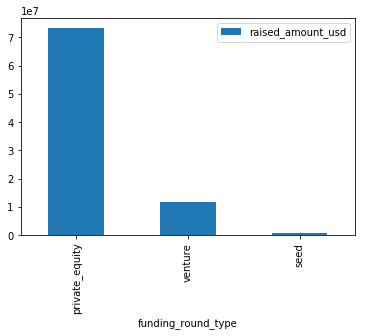

In [64]:
m_f2=m_f1.sort_values(by='raised_amount_usd',ascending=False)
m_f2.plot(kind='bar')


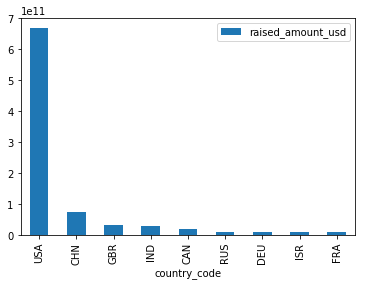

In [67]:
top9=top9.sort_values(by='raised_amount_usd',ascending=False)
top9.plot(kind='bar')

In [ ]:
zx.groupby('country_code')['funding_round_type'].count().sort_values(ascending=False)
